Playing with my son memory, I noted, that there is usually somewhere a directly neighboring pair in the tile area. (Directly neighboring is defined as neighboring on a edge, not just over a corner. )

Why are there those pair? Is it just because of not perfect mixing? Or is it normal? As a scientist I know that no repetation at all is often unlikely and that small patterns can appear by chance. In contrast, my wife thought that there should be usually no neighbors. 

To solve that I use now python for calclulations, first I import the libraries. 

In [2]:
#importing the necessary libraries
import numpy as np
import logging
import time
import calendar
import itertools
import math

from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.cm as cm
%matplotlib inline

import seaborn as sns


Now let's define the needed functions. 

First a function which creates a ordered memory sequence. 

In [5]:
#ordered numbers
def ord_memory(n_pair):
    lis=[]
    for i in range(n_pair):
        lis.append(i)
        lis.append(i)
        arr=np.asarray(lis)
    return(arr)

Then a function which creates a random sequence of x memory pairs (which are here just numbers).

In [6]:
def random_1d(n_pair):
    #this shuffle function is used
    d = np.random.default_rng()
    #the previos function is used as inout
    arr=ord_memory(n_pair)
    #shuffle
    d.shuffle(arr)   
    return(arr)

Then a function which for x memory pairs calculate the most compact (Most similar to a square) rectangle. 

In [7]:
#This function gets the most compact rectangle for a number of pairs
def fac(n_pair):
    #factors to output
    xar=np.zeros(2,dtype=int)
    #run until square root reached
    for i in range(int(np.sqrt(2*n_pair))):
        #execute if no rest in division, if yes pair  overwritten with more similar ones if possible
        if 2*n_pair/(i+1)%1==0:
            xar[0]=1+i
            xar[1]=2*n_pair/xar[0]
    return xar        

The number of pairs in the memory game of my son is 12. Now the created functions are applied, to create a memory tiling. Then it is visualized in the plot.

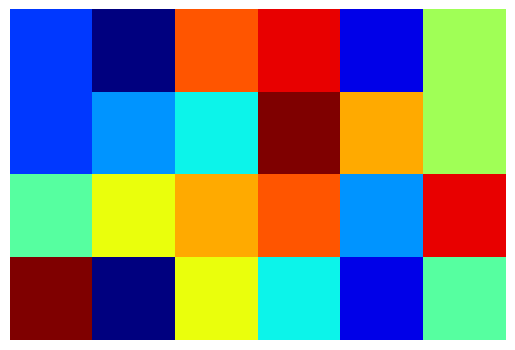

In [8]:
n_pair=12
xar=fac(n_pair)
shuf=random_1d(n_pair)
reord=shuf.reshape(xar[0], xar[1])
plt.axis('off')
plt.imshow(reord,cmap=cm.jet, interpolation='nearest')
#add pictures of real memory at some point

Since some neighbors have the same colors, there are neighbors as many random draws but not in all.

The most straight forward way is to just count the possible pairs.  That I do below for the smallest possible memory of two pairs. 

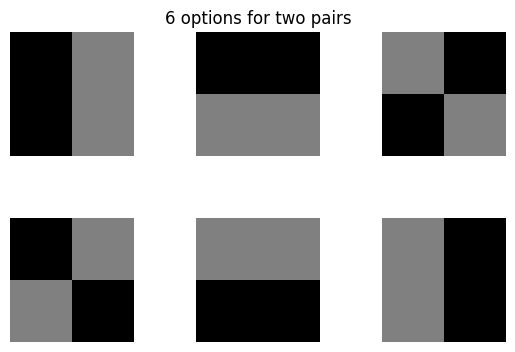

In [9]:
mem2a=[[2,2],[1,1]]
mem2b=[[2,1],[2,1]]
mem2c=[[1,2],[2,1]]
mem2d=[[2,1],[1,2]]
mem2e=[[1,2],[1,2]]
mem2f=[[1,1],[2,2]]
com=np.zeros((8,5))
com[0:2,0:2]=mem2a
com[3:5,0:2]=mem2b
com[6:8,0:2]=mem2c
com[0:2,3:5]=mem2d
com[3:5,3:5]=mem2e
com[6:8,3:5]=mem2f
plt.axis('off')
plt.title("6 options for two pairs")
plt.imshow(1-com.T,cmap=cm.gray, interpolation='nearest')

There are six possibilities. 4 of 6 have neighboring pairs, only 2 of 6, a third has not. 

The number of total options follows from the following consideration:
4 options can draw for the first location. Multiplied on that are then three options for the second location and then two to for the third while only one option remains for the last location. (This operation of multiplying a number by all number equal or smaller than itself is the factorial of a number.) That results into 24 options, as true for 4 different option. However, because in this case we have two identical pairs, they are equavalent and thus the result is divided twice by 2. (Mathematical that is 2 to to the power of 2.)

As equation it is: N!/(2)^(N/2) for draw options, which for a number of pairs is:  (2*P)!/2^P

For two pairs it is: (4 *3 *2)/2^2=24/4=6

That means already for 3 pairs, it are much more: 6 *5 *4 *3 *2/2^3=90 possibilities.

Thus  already for three pairs there are a lot of posisbilities. While that still can be counted by a man, it is proon to errors
and thus we construct a program. 

First, a helper function which converts to tuples to list. 

In [10]:
#convert tuple of tuple to list of list 
def tuple_to_list(t):
    return [list(x) for x in t]

Then a function which selects from all permutations the unique one. 

In [12]:
#not ideal from memory usuage since first are created, also not fast 
#for 4 , 5 seconds 
#5 are 3628800 in total uniques are   takes hours at least 
#get unique permutations for a number of memory pairs
def uniqper(pairs):
    start_time=time.time()
    #create two vectors of length
    arra = np.arange(pairs)
    arrb = np.arange(pairs)
    #combine them
    arr=np.concatenate((arra,arrb))
    #convert to list
    lista=arr

    #get permutaations
    a=list(itertools.permutations(lista))
    #convert to list
    lista=tuple_to_list(a)
    #fill first element which is never a duplication
    listb=[lista[0]]
    c=1
    print(f"all permutations are {len(lista)}")
    for i in range(1,len(lista)):
        x=0
        j=0
        #check for equality in while loop should make it faster
        while x==0 and j<len(listb):
            if lista[i]==listb[j]:
                x=1
            j+=1    
        if x==0:
            listb.append(lista[i])
            c+=1
    print(f"unique permutations are {c}") 
    bar=np.array(listb) 
    stop_time=time.time()
    print(f"run time is {stop_time-start_time} s")
    return bar

We now run the program to get the permutations of 3 pairs and siaplay then the options. 

all permutations are 720
unique permutations are 90
run time is 0.010399580001831055 s


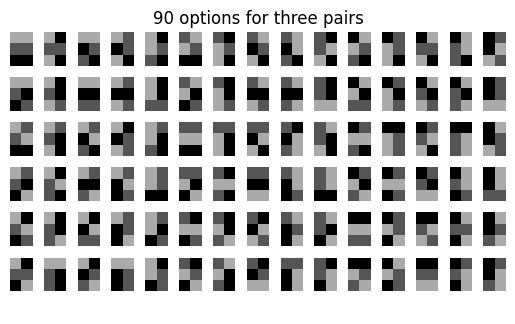

In [13]:
n_pair=3
res=uniqper(n_pair)
xar=fac(n_pair)
mem=np.zeros((44,25))
for i in range(15):
    for j in range(6):
        res2=res[j+i*6]
        reord=res2.reshape(xar[0], xar[1])+1
        mem[i*3:2+3*i,4*j:3+4*j]=reord
plt.axis('off')
plt.title("90 options for three pairs")
plt.imshow(1-mem.T,cmap=cm.gray, interpolation='nearest')

As visible the number of permutations is too latrge that man cxan reliable count the fraction. 

Therefore another function is constructed which determines whether a tile was neighboring pair. 
It does not ensure that there are only unique pairs in it. The problem isnthat ensuring that needs
more time than checking for neighbors while it does not change the result since duplicates just increase the number of all patterns with the same factor.

In [14]:
def prob_all_perm(n_pair):
    print(str(n_pair)+" pairs")
    #time for knowing run_time
    start_time=time.time()
    list_pairs=ord_memory(n_pair)
    #permute list
    perm_object=list(itertools.permutations(list_pairs))
    #convert permutation object to list
    list_permutations=tuple_to_list(perm_object)
    #convert to array, each row is one to be tested case
    arr=np.array(list_permutations)
    #dimensions of reordering to tile
    dim=fac(n_pair)
    print(f"number of permutations {arr.shape[0]}")
    #number of cases with no neighbors
    no_neighbor=0
    for i in range(arr.shape[0]):
        reord=arr[i].reshape(dim[0], dim[1])
        c=0
        #subtract by one shifted in both axis
        if n_pair>2:
            x1=np.min(abs(reord[0:dim[0]-1,:]-reord[1:dim[0],:]))
            #create dummy only changed if second operation needed
            x2=0
            #only done if no macth in first part
            if x1>0:
                x2=np.min(abs(reord[:,0:dim[1]-1]-reord[:,1:dim[1]]))
            #enarge counter by one if no match 
            if x1>0 and x2>0:
                c=1
        if n_pair==2:
            #special case for two pairs
            if reord[0,0]!=reord[0,1] and reord[0,0]!=reord[1,0]:
                c=1
        no_neighbor+=c
    stop_time=time.time()
    print(f"run time is {round(stop_time-start_time,4)} sec")
    print(f"no neighbor in tile to {round(no_neighbor/arr.shape[0]*100,2)} % ")  
    return no_neighbor/arr.shape[0]

In [15]:
res=np.zeros((2,4))
for i in range(res.shape[1]):
    npair=2+i
    res[0,i]=npair
    res[1,i]=prob_all_perm(npair)
np.savetxt("probabilities_all_permutations.txt", res) 
#6 pairs fails because of storage problem, would also take long 

2 pairs
number of permutations 24
run time is 0.0002 sec
no neighbor in tile to 33.33 % 
3 pairs
number of permutations 720
run time is 0.0177 sec
no neighbor in tile to 13.33 % 
4 pairs
number of permutations 40320
run time is 0.559 sec
no neighbor in tile to 20.0 % 
5 pairs
number of permutations 3628800
run time is 47.7704 sec
no neighbor in tile to 19.68 % 


It is visisble in the printed numbers that clearly less 50% have no pairs in a tiling. While there is a lot variation between 2 and 4 pairs, the fraction is then more stable, but 2 is a too small range to be certain about a trend. 

Already 5 pairs takes long to run on a laptop and 6 does not work. 

In [3]:
all_perm_prob=np.loadtxt("probabilities_all_permutations.txt")

As shown even with a laptop it is not possible to test also options to get the probablities.

Therefor, I use in the following two approximations to get probabilities. 

The first calculates it from the number of pairs and how the are tiled. It assumes that each pairs is independent of each other. It determines first the number of corner, edge and inner tile because the number of neighbors depends on that. The number of neighbors need to me divided by two since otherwise each neighborship is counted twice.  
By this number is then the probability of single tile taken to the power.
The probablity is how likely it is that for a single neighbordhio they are not a pair. Just one of the 2*pairs is a problem, given that one of the N is already excluyded it is the tile considered, the probability is (2 * N-2)/(2*N-1) 

In [17]:
#analytic probability
def ana_prob(n_pair):
    #dimeniosn of the tile
    xar=fac(n_pair)
    #number of corner
    corn_num=4
    #inner tile
    inner_num=(xar[0]-2)*(xar[1]-2)
    #rest is number of edge 
    edge_num=xar[0]*xar[1]-inner_num-corn_num
    #get number of neighbors, divide by two since it work both ways 
    n_neigh=(inner_num*4+edge_num*3+corn_num*2)/2
    #excluding the current one there 2_n-1 in the denominator, in the numertator it is 1 less more
    prob=((2*n_pair-2)/(2*n_pair-1))**(n_neigh)
    return xar[0],  xar[1], prob        


We calculate that for up to 12 pairs. 

In [22]:
nn=int(12)-1
res_ana=np.zeros((4,nn))
for i in range(nn):
    res_ana[0,i]=i+2
    a,b,c=ana_prob(i+2)
    res_ana[1,i]=a
    res_ana[2,i]=b
    res_ana[3,i]=c        

We compare the this way obtained answer with the probabilities obtained when checking all permutations in the plot below. 

Text(0, 0.5, '% of having no neighboring pair')

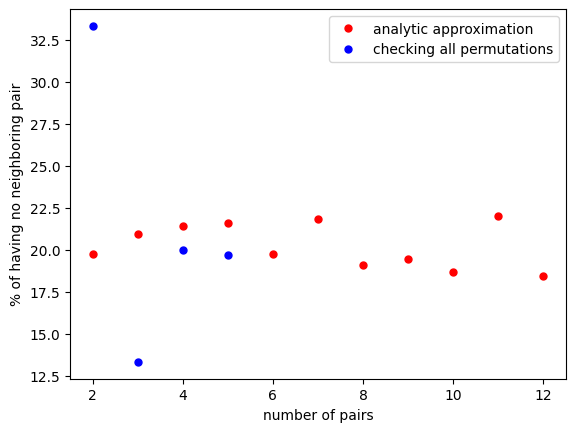

In [30]:
plt.plot(res_ana[0],res_ana[3]*100,'o',ms=5,color='red', label='analytic approximation')  
plt.plot(all_perm_prob[0],all_perm_prob[1]*100,'o',ms=5,color='blue', label='checking all permutations')  
plt.legend(loc="best")
plt.xlabel("number of pairs")
plt.ylabel("% of having no neighboring pair")

For 2 and 3 the resukts are rather different, then they get more similar. The high probbaility for 2 pairs is because when there is one pair then there is also a second pair. Because the number of pairs is constant there then relatively many cases without pairs occur then. In essnetnce the different pairs are not fully independent. 

While its is expected that this problem is smaller for a larger number of pairs, we also use another way for getting a probability, randomly drawing numbers. 

In [42]:
#parameters, number_of_pairs, number of random draws
def count_rand_pairb(pairs,draws):
    #convert to integer
    pairs=int(pairs)
    #dimensions of tiled area
    dim=fac(pairs)
    #counter for no_pair cases
    counter=0
    #do the number of random draws
    for i in range(draws):
        #shuffle the pairs
        shuf=random_1d(pairs)
        dim=fac(pairs)
        reord=shuf.reshape(dim[0], dim[1])
        #paremter which is one when no neighboring pair is found
        no_pair=0
        #method 1 if more than 2 pair 
        if pairs>2:
            #check for miniumj when shifted by 1 in dimension0
            x1=np.min(abs(reord[0:dim[0]-1,:]-reord[1:dim[0],:]))
            #create dummy only changed if second operation needed
            x2=0
            #second dimension only done if not zero in first part
            if x1>0:
                x2=np.min(abs(reord[:,0:dim[1]-1]-reord[:,1:dim[1]]))
            #enarge counter by one if no match 
            if x1>0 and x2>0:
                no_pair=1
        if pairs==2:
            #special case for two pairs, just check two cases 
            if reord[0,0]!=reord[0,1] and reord[0,0]!=reord[1,0]:
                no_pair=1
            
        counter+=no_pair                  
    return counter/draws 

We run that for up two 12 pairs. 

In [54]:
time_start = time.time()
nn=11
res3=np.zeros((2,nn))
for i in range(nn):
    print(i+2)
    res3[0,i]=i+2
    res3[1,i]=count_rand_pairb(res3[0,i],100000)
time_stop = time.time()    
print(time_stop-time_start)
np.savetxt('random_2_to12_its100000.txt',res3)

2
3
4
5
6
7
8
9
10
11
12
85.53319978713989


By comoarsion with up to 5 draws it is possible to see how many draws are needed that random effect are not anymore cause large effects. More than 10000 are needed.

[[ 2.       3.       4.       5.       6.       7.       8.       9.
  10.      11.      12.     ]
 [ 0.33306  0.13348  0.20239  0.19568  0.17591  0.20661  0.17452  0.18082
   0.17405  0.21434  0.1743 ]]
[[ 2.          3.          4.          5.          6.          7.
   8.          9.         10.         11.         12.        ]
 [ 2.          2.          2.          2.          3.          2.
   4.          3.          4.          2.          4.        ]
 [ 2.          3.          4.          5.          4.          7.
   4.          6.          5.         11.          6.        ]
 [ 0.19753086  0.2097152   0.21405832  0.21628042  0.19784467  0.21853449
   0.19093372  0.19458917  0.18710527  0.22035947  0.1846733 ]]


Text(0, 0.5, '% of having no neighboring pair')

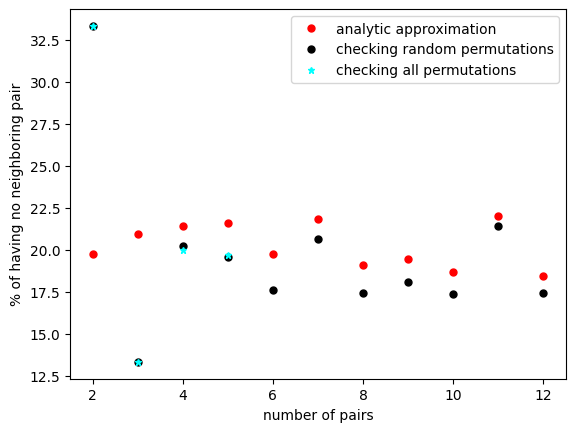

In [58]:
res3=np.loadtxt('random_2_to12_its100000.txt')
print(res3)
print(res_ana)
plt.plot(res_ana[0],res_ana[3]*100,'o',ms=5,color='red', label='analytic approximation')   
plt.plot(res3[0],res3[1]*100,'o',ms=5,color='black', label='checking random permutations')
plt.plot(all_perm_prob[0],all_perm_prob[1]*100,'*',ms=5,color='cyan', label='checking all permutations') 
plt.legend(loc="best")
plt.xlabel("number of pairs")
plt.ylabel("% of having no neighboring pair")

Overall it is visisble that the anlytic method overestimate the number of no pairs slightly, by about 1%. Both agree that a no pairs is unlikely. For 12 it happens with about 17.4% probability that corresponds to about once is six games.   


In both method it is visible that no pair is more likely for some numbers like 7 and 11. Those numbers are prime numbers which means the rectangle is elongated to 2 times the prime number. Since then there no inner tile there then less neighbors and thus no pairs is more likely. 

Below is more, is mainly on larger numbers of pairs. Not clear whether needed. 

In [14]:
nn=int(999)
res3=np.zeros((2,nn))
current_GMT = time.gmtime(1)

time_start = time.time()
for i in range(nn):
    print(i)
    res3[0,i]=i+1
    res3[1,i]=count_rand_pairb(res3[0,i],100)
time_stop = time.time()    
print(time_stop-time_start)
#np.savetxt('random_1_to1000_its10000.txt',res3)
#7.6 previous code 
#4.3 with c stop on first level 
#2.9 when using only one sided 
#2.6 only checking wither larger is in frame
#without checking for exist before one loop less 0.88
#more C conditions 0.85 (used 100 up to n=100 apirs)
#shufted array only execute second part about 0.78
#1059.5 1_to1000_its10000 1060  seems faster for larger numbers 

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

(0.0, 1000.0)

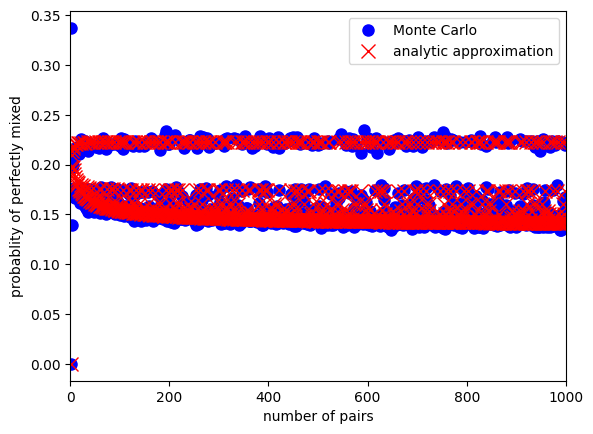

In [31]:
#is slow now
#results look good, for very small appoximation is less good 
res2=np.loadtxt('random_upto100_its10000.txt')
res3=np.loadtxt('random_1_to1000_its10000.txt')
plt.plot(res3[0],res3[1],'o',ms=8,color='blue',label='Monte Carlo') 
plt.plot(res[0],res[3],'x',ms=10,color='red',label='analytic approximation')  
#plt.plot(res2[0],res2[1],'o',ms=5,color='blue',label='Monte Carlo 10000')  
plt.legend(loc="best")
plt.xlabel("number of pairs")
plt.ylabel("probablity of perfectly mixed")
plt.xlim(0,1000)

(0.0, 100.0)

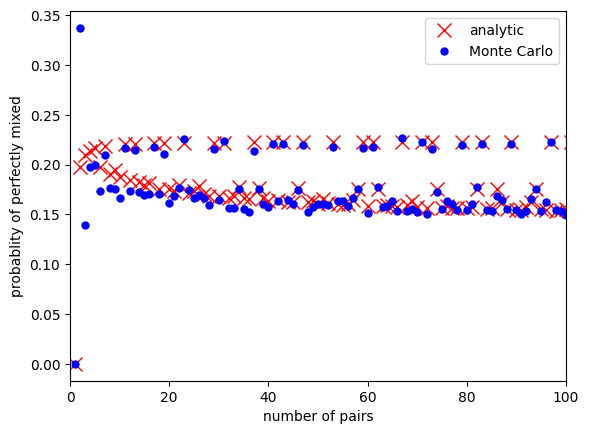

In [29]:
plt.plot(res[0],res[3],'x',ms=10,color='red',label='analytic')  
plt.plot(res3[0],res3[1],'o',ms=5,color='blue',label='Monte Carlo') 
#plt.plot(res2[0],res2[1],'o',ms=5,color='blue',label='Monte Carlo 10000')  
plt.legend(loc="best")
plt.xlabel("number of pairs")
plt.ylabel("probablity of perfectly mixed")
plt.xlim(0,100)

In [28]:
print(np.mean(res2[1,1:100]/res3[1,1:100]))
print(np.std(res2[1,1:100]/res3[1,1:100]))

0.9995687119214739
0.03360270579623273


/tmp/ipykernel_6405/3383112364.py:1: RuntimeWarning: invalid value encountered in divide
  plt.plot(res3[0],res[3,0:999]/res3[1],'o',ms=8,color='blue',label='analytic/Monte Carlo')


(0.0, 1000.0)

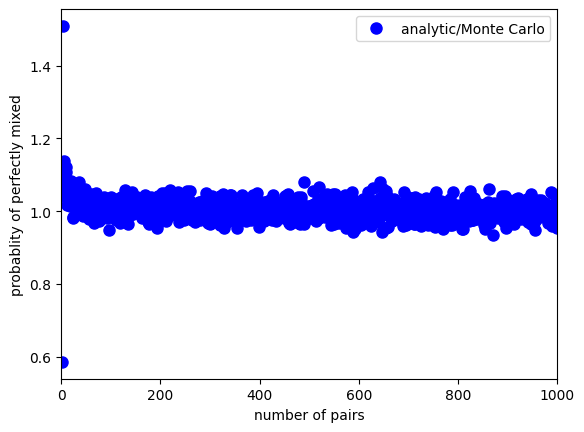

In [40]:
plt.plot(res3[0],res[3,0:999]/res3[1],'o',ms=8,color='blue',label='analytic/Monte Carlo') 
#plt.plot(res2[0],res2[1],'o',ms=5,color='blue',label='Monte Carlo 10000')  
plt.legend(loc="best")
plt.xlabel("number of pairs")
plt.ylabel("probablity of perfectly mixed")
plt.xlim(0,1000)

/tmp/ipykernel_6405/4121775268.py:1: RuntimeWarning: invalid value encountered in divide
  plt.plot(res3[0],res[3,0:999]/res3[1],'o',ms=8,color='blue',label='analytic/Monte Carlo')


(0.9, 1.1)

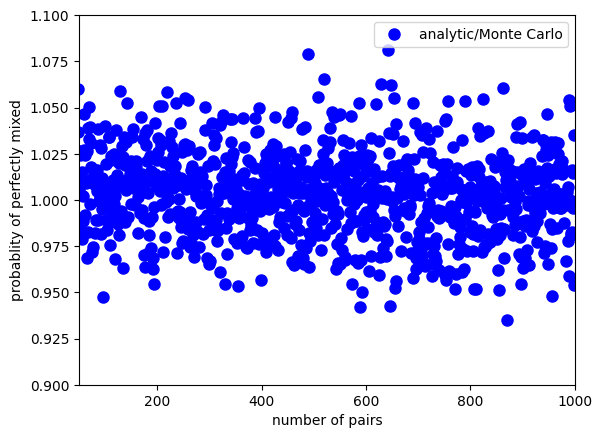

In [43]:
plt.plot(res3[0],res[3,0:999]/res3[1],'o',ms=8,color='blue',label='analytic/Monte Carlo') 
#plt.plot(res2[0],res2[1],'o',ms=5,color='blue',label='Monte Carlo 10000')  
plt.legend(loc="best")
plt.xlabel("number of pairs")
plt.ylabel("probablity of perfectly mixed")
plt.xlim(50,1000)
plt.ylim(0.9,1.1)